In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Replace intermediary jurisdiction with officer base
jurisdiction_status_list = ['jurisdiction','officer_base','officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
338119,Indonesia,British Virgin Islands
338120,Cook Islands,British Virgin Islands
338121,Hong Kong,British Virgin Islands
338122,Cook Islands,United Kingdom


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


### Convert Data to an Undirected Edge List

In [7]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [8]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
#df_net = pd.DataFrame(result)
#df_net

In [10]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [11]:
#import df_net to csv later

In [12]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


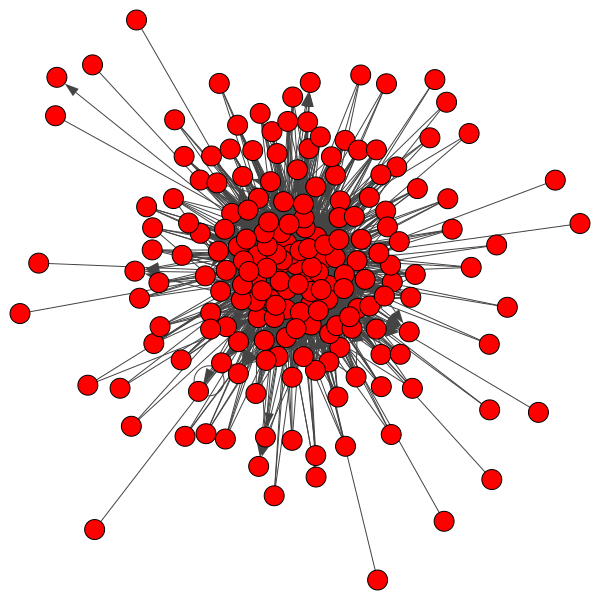

In [13]:
ig.plot(g)

In [14]:
g.diameter()

4

In [15]:
len(g.vs.indices)

195

In [16]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

Hong Kong                    58
Taiwan                       53
China                        52
Singapore                    50
United States                49
                             ..
Uganda                        1
Sint Maarten (Dutch part)     1
Central African Republic      1
Cameroon                      1
Zambia                        1
Name: node_start, Length: 189, dtype: int64

In [17]:
uni =df_jur_grouped['node_start'].unique()

In [18]:
len(uni)

189

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 8, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 9, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 10, {'name': 'Ireland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f9b72a01c70>, 11, {'name':

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,71.273196,0.01,4.0,-0.463328,14.149485,0.072935,1.959808
1,2,71.233161,0.01,4.0,-0.463670,14.176166,0.073452,1.959453
2,3,69.562500,0.02,4.0,-0.463227,14.223958,0.074083,1.949456
3,4,68.335079,0.02,4.0,-0.463776,14.225131,0.074477,1.945318
4,5,68.168421,0.03,4.0,-0.463716,14.284211,0.075180,1.943198


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.0,0.97,0.0,NaN,0.0,0.0,NaN
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,13.0,128.677022,-0.461188,1695.469072,0.072696,0.005155,0.009075,1.956959
1,2,0.01,13.0,127.693250,-0.461467,1700.585492,0.072029,0.005181,0.009117,1.959304
2,3,0.02,13.0,126.518705,-0.461109,1709.416667,0.072673,0.005208,0.009165,1.953667
3,4,0.02,13.0,125.075750,-0.463428,1716.340314,0.072503,0.005236,0.009213,1.953149
4,5,0.03,13.0,125.161663,-0.463183,1725.342105,0.073130,0.005263,0.009261,1.952374


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
180,181,0.92,41.0,5.357143,-0.562860,1148.214286,0.158163,0.071429,0.072408,1.573770
181,182,0.93,41.0,5.461538,-0.551767,1236.230769,0.171598,0.076923,0.077978,1.571429
182,183,0.93,42.0,5.333333,-0.542218,1292.750000,0.173611,0.083333,0.084474,1.600000
183,184,0.94,42.0,5.818182,-0.542218,1410.272727,0.206612,0.090909,0.092153,1.600000
184,185,0.94,64.0,3.300000,-0.434520,1547.400000,0.220000,0.100000,0.101367,1.444444
185,186,0.95,88.0,2.111111,-0.485363,1475.555556,0.148148,0.111111,0.111238,1.708333
186,187,0.95,88.0,2.000000,-0.458171,1659.625000,0.171875,0.125000,0.125143,1.666667
187,188,0.96,88.0,1.857143,-0.421464,1896.142857,0.204082,0.142857,0.143021,1.611111
188,189,0.96,88.0,2.000000,-0.300000,1955.333333,0.194444,0.166667,0.166681,1.733333
189,190,0.97,11626.0,0.600000,NaN,2343.200000,0.200000,0.200000,0.200000,1.375000


### Targeted attack

In [26]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,161557.0
14,14,Panama,47466.0
17,17,Seychelles,16514.0
4,4,United Kingdom,15594.0
1,1,Bahamas,15547.0
9,9,Hong Kong,13051.0
15,15,Russia,10494.0
13,13,Niue,9456.0
16,16,Samoa,6255.0
5,5,United States,4136.0


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
76,76,Cameroon,0.0
75,75,Cambodia,0.0
74,74,Bulgaria,0.0
73,73,Brunei,0.0
67,67,Brazil,0.0
66,66,Botswana,0.0
65,65,Bosnia and Herzegovina,0.0
64,64,Bolivia,0.0
63,63,Bhutan,0.0
58,58,Benin,0.0


In [30]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Panama',
 'Seychelles',
 'United Kingdom',
 'Bahamas',
 'Hong Kong',
 'Russia',
 'Niue',
 'Samoa',
 'United States',
 'British Anguilla',
 'Cyprus',
 'Ireland',
 'China',
 'Barbados',
 'Bermuda',
 'Canada',
 'Cayman Islands',
 'Nevada',
 'Latvia',
 'Saint Kitts and Nevis',
 'United Arab Emirates',
 'Singapore',
 'Labuan',
 'Luxembourg',
 'Jersey',
 'Belize',
 'Isle of Man',
 'Malta',
 'Cook Islands',
 'Switzerland',
 'Antigua and Barbuda',
 'State of Delaware',
 'Netherlands',
 'Ukraine',
 'Mauritius',
 'Czech Republic',
 'Sweden',
 'Costa Rica',
 'Gibraltar',
 'Austria',
 'Liechtenstein',
 'Germany',
 'Uruguay',
 'Wyoming',
 'Curaçao',
 'Turks and Caicos Islands',
 'New Zealand',
 'Israel',
 'Guernsey',
 'Belarus',
 'South Africa',
 'Saint Vincent and the Grenadines',
 'Croatia',
 'Malaysia',
 'Vanuatu',
 'Grenada',
 'Liberia',
 'Thailand',
 'Saint Lucia',
 'Georgia',
 'Netherlands Antilles',
 'Serbia',
 'Australia',
 'US Virgin Islands',
 'Mexico',
 'Kuwa

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,69.711340,4.0,-0.445776,13.046392,0.067249,1.982563
1,2,0.01,Panama,67.580311,4.0,-0.437642,12.165803,0.063035,1.993147
2,3,0.02,Seychelles,65.302083,4.0,-0.442518,11.588542,0.060357,1.990207
3,4,0.02,United Kingdom,65.015707,4.0,-0.435826,10.759162,0.056331,2.011897
4,5,0.03,Bahamas,64.678947,4.0,-0.439107,10.200000,0.053684,2.027508


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.97,French Guiana,0.0,0.0,NaN,0.0,0.0,NaN
191,192,0.98,Finland,0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Fiji,0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,El Salvador,0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Zimbabwe,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,British Virgin Islands,123.318340,10.0,-0.445776,835.108247,0.067249,0.005155,0.011758,1.982563
1,2,0.01,Panama,118.358212,10.0,-0.437642,568.476684,0.063035,0.005181,0.030395,1.993147
2,3,0.02,Seychelles,114.208219,10.0,-0.442518,490.895833,0.060357,0.005208,0.025244,1.990207
3,4,0.02,United Kingdom,113.084191,69.0,-0.435826,399.968586,0.056331,0.005236,0.029197,2.011897
4,5,0.03,Bahamas,111.079491,69.0,-0.439107,330.778947,0.053684,0.005263,0.025366,2.027508
5,6,0.03,Hong Kong,104.790214,180.0,-0.416024,207.301587,0.049047,0.005291,0.018063,2.099261
6,7,0.04,Russia,102.270380,180.0,-0.405745,161.154255,0.045213,0.005319,0.017887,2.127274
7,8,0.04,Niue,101.286951,180.0,-0.410094,131.828877,0.043839,0.005348,0.030924,2.134736
8,9,0.05,Samoa,99.828589,180.0,-0.417516,116.784946,0.042259,0.005376,0.028140,2.144483
9,10,0.05,United States,95.845050,234.0,-0.404343,86.881081,0.038714,0.005405,0.027035,2.188102


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
45,46,0.23,Curaçao,0.010067,10.0,-0.397806,0.503356,0.001892,0.006711,0.022480,1.02439
46,47,0.24,Turks and Caicos Islands,0.003378,10.0,-0.419788,0.445946,0.001780,0.006757,0.017949,1.00000
47,48,0.24,New Zealand,0.003401,10.0,-0.339761,0.346939,0.001573,0.006803,0.017863,1.00000
48,49,0.25,Israel,0.003425,10.0,-0.316980,0.308219,0.001360,0.006849,0.016549,1.00000
49,50,0.26,Guernsey,0.003448,10.0,-0.358262,0.296552,0.001332,0.006897,0.016663,1.00000
...,...,...,...,...,...,...,...,...,...,...,...
190,191,0.97,French Guiana,0.000000,0.0,NaN,0.000000,0.000000,0.250000,1.000000,NaN
191,192,0.98,Finland,0.000000,0.0,NaN,0.000000,0.000000,0.333333,1.000000,NaN
192,193,0.98,Fiji,0.000000,0.0,NaN,0.000000,0.000000,0.500000,1.000000,NaN
193,194,0.99,El Salvador,0.000000,0.0,NaN,0.000000,0.000000,1.000000,1.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted

#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

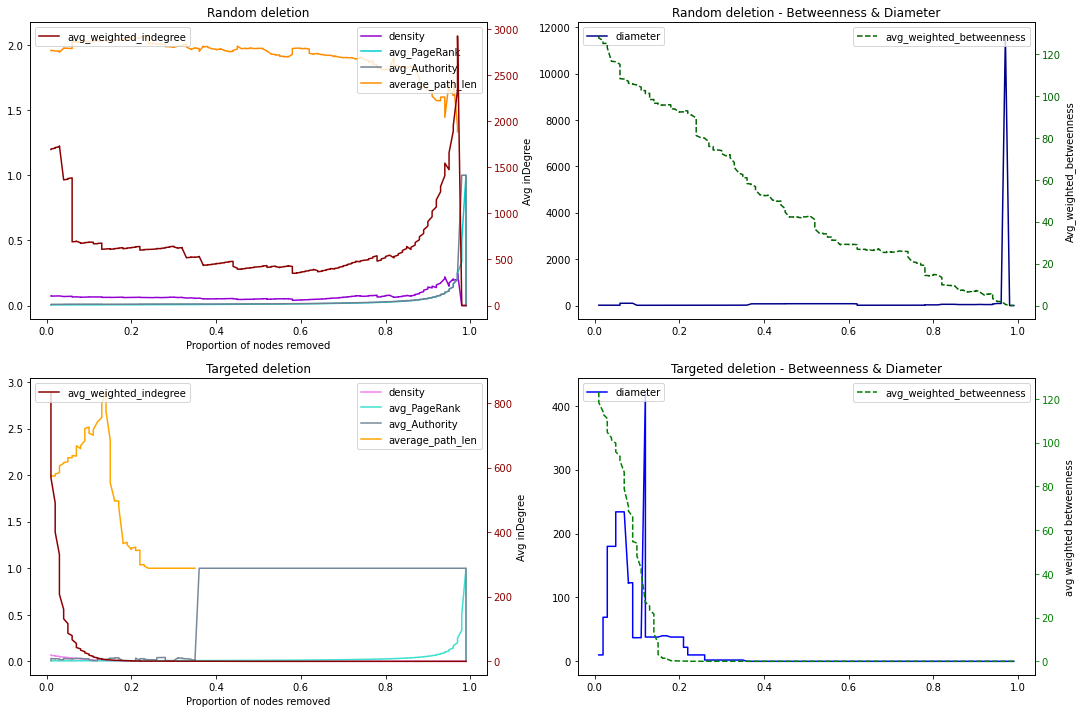

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
#remove assortativity degree, replace with pagerank
ax[0,0].plot('prop_removed','avg_PageRank',data=df_type1_weighted,ls='-',color='darkturquoise')
#add in authority score
ax[0,0].plot('prop_removed','avg_Authority',data=df_type1_weighted,ls='-',color='slategray')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[1,0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
# add in Authority
ax[1,0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()